In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np

env = gym.make("FrozenLake-v1", render_mode="rgb_array")
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>

In [2]:
env.observation_space # 4x4 grid

Discrete(16)

In [3]:
state_dim = env.observation_space.n
state_dim

16

In [4]:
env.action_space # left:0, down:1, right:2, up:3

Discrete(4)

In [5]:
action_dim = env.action_space.n
action_dim

4

In [6]:
q_values = np.zeros([state_dim, action_dim])
q_values.shape

(16, 4)

In [7]:
observation, info = env.reset()
observation, info

(0, {'prob': 1})

In [8]:
action = env.action_space.sample() # choose a random action
action

2

In [9]:
observation, reward, terminated, truncated, info = env.step(action)
observation, reward, terminated, truncated, info

(4, 0.0, False, False, {'prob': 0.3333333333333333})

In [10]:
env_screen = env.render() # numpy array

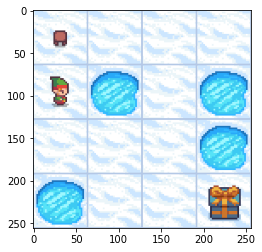

In [11]:
plt.imshow(env_screen)

In [12]:
###################################
# play Frozen Lake with a policy
###################################

import gym
import numpy as np

policy = [0,3,3,3,
          0,0,0,0,
          3,1,0,1,
          1,2,1,2]

env = gym.make("FrozenLake-v1", render_mode="rgb_array")
observation, _ = env.reset()
NUM_EPISODES = 1000
rewards = np.zeros(NUM_EPISODES)
for i in range(NUM_EPISODES):
    terminated = False
    observation, _ = env.reset()
    total_reward = 0.0
    while not terminated:
        action = policy[observation]
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
    rewards[i] = total_reward
rewards.mean()

0.822